# 幸福感预测

## 一 数据来源
赛题使用的数据来自中国人民大学中国调查与数据中心主持之《中国综合社会调查（CGSS）》项目。赛题感谢此机构及其人员提供数据协助。中国综合社会调查为多阶分层抽样的截面面访调查。
- happiness_train_complete.csv训练数据集
- happiness_test_complete.csv测试数据集

## 二 分析目标

赛题使用公开数据的问卷调查结果，选取其中多组变量，包括个体变量（性别、年龄、地域、职业、健康、婚姻与政治面貌等等）、家庭变量（父母、配偶、子女、家庭资本等等）、社会态度（公平、信用、公共服务等等），来预测其对幸福感的评价。

幸福感预测的准确性不是赛题的唯一目的，更希望选手对变量间的关系、变量群的意义有所探索与收获。

## 三 数据分析

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [16]:
train = pd.read_csv('d:/python/exercise/samples/happiness/happiness_train_complete.csv',parse_dates=['survey_time'],encoding='iso-8859-1')

In [17]:
test = pd.read_csv('d:/python/exercise/samples/happiness/happiness_test_complete.csv', parse_dates=['survey_time'], encoding = 'iso-8859-1')

In [18]:
pick_index = pd.read_excel('d:/python/exercise/samples/happiness/happiness_index_copy.xlsx', encoding = 'iso-8859-1', header = None)

In [19]:
pick_index = pick_index.iloc[:,0]
pick_index = list(pick_index.values)

In [20]:
train[pick_index]

,id,survey_type,survey_time,gender,birth,religion,edu,income,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,health,depression,hukou,socialize,relax,learn,socia_outing,equity,happiness,class,class_10_after,work_exper,insur_1,insur_2,insur_3,insur_4,family_income,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,son,daughter,marital,status_peer,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13
0,1,1,2015-08-04 14:18:00,1,1959,1,11,20000,45.0,0,1,0,0,0,0,0,0,0,3,5,5,2,4,3,2,3,4,3,3,1,1,1,1,2,60000.0,2,1,2,0,1,0,0,0,0,0,0,0,1,0,3,3,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1
1,2,2,2015-07-21 15:04:00,1,1992,1,12,20000,110.0,0,0,0,0,1,0,0,0,0,5,3,1,2,4,3,1,3,4,6,8,1,1,1,1,1,40000.0,4,1,2,0,1,0,0,0,0,0,0,0,0,0,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2
2,3,2,2015-07-21 13:24:00,2,1967,0,4,2000,120.0,0,1,1,0,0,0,0,0,0,4,5,1,3,4,2,2,4,4,5,6,2,1,1,2,2,8000.0,3,1,2,0,1,0,0,0,0,0,0,0,0,2,3,2,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1
3,4,2,2015-07-25 17:33:00,2,1943,1,3,6420,78.0,0,0,0,1,0,0,0,0,0,4,4,1,2,4,4,1,4,5,5,7,4,2,2,2,2,12000.0,3,1,1,0,1,0,0,0,0,0,0,0,1,4,7,2,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2
4,5,1,2015-08-10 09:50:00,2,1994,1,12,-1,70.0,0,0,0,0,1,0,0,0,0,5,3,2,4,3,4,3,2,4,1,1,6,1,2,2,2,-2.0,3,1,1,0,1,0,0,0,0,0,0,0,0,0,1,3,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2
5,6,2,2015-07-18 12:09:00,1,1946,1,2,5000,300.0,0,1,1,0,0,0,0,0,0,5,4,1,3,3,2,1,4,5,8,8,4,1,1,2,2,5000.0,3,1,2,0,1,0,0,0,0,0,0,0,2,1,3,3,4,3,10000.0,4,3,4,3,5,4,3,3,4,3,3,3,3
6,7,1,2015-07-26 14:51:00,1,1963,1,4,-3,89.0,0,1,0,0,0,0,0,0,0,2,2,2,1,3,1,1,4,4,2,3,1,1,1,2,2,-3.0,2,1,2,0,1,0,0,0,0,0,0,0,1,0,3,3,4,3,50000.0,4,3,4,4,4,3,3,3,4,3,3,3,3
7,8,1,2015-07-19 13:12:00,1,1959,0,4,-1,130.0,0,0,1,0,0,0,0,0,0,3,5,2,3,3,3,1,4,4,2,2,5,1,1,2,2,-1.0,3,1,2,0,1,0,0,0,0,0,0,0,1,0,3,2,4,-8,-2.0,5,5,5,5,5,5,5,5,5,5,5,5,5
8,9,2,2015-08-01 09:25:00,1,1952,1,3,1600,36.0,0,1,0,0,0,0,0,0,0,2,2,1,2,2,1,2,4,4,3,5,2,1,1,2,2,1600.0,2,1,2,0,1,0,0,0,0,0,0,0,0,0,1,3,3,3,5000.0,3,2,2,4,5,5,5,2,4,4,4,4,2
9,10,2,2015-08-03 19:23:00,1,1985,1,3,60000,80.0,0,0,0,0,1,0,0,0,0,4,4,1,3,3,2,6,4,4,5,6,5,1,2,2,2,60000.0,3,1,1,0,1,0,0,0,0,0,0,0,0,2,3,2,3,2,120000.0,4,3,4,3,3,3,3,4,3,3,-8,3,2


In [21]:
train.shape

(8000, 140)

In [22]:
test.shape

(2968, 139)

In [23]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,1,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,1,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,2,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,2,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,2,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


In [24]:
test.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,8001,1,2,2,9,2015-07-24 10:30:00,2,1972,8,0,1,4,NaN,2.0,1989.0,18000,1,NaN,100.0,0,1,1,0,0,0,0,0,0,NaN,155,120,4,4,4,4,1,2,2,1,4,3,2,1,4,2,4,4,3,3,3,3,5,1,3,3,3,2,1.0,3.0,1,2,5,5,5,4,1,5.0,12.0,2.0,3.0,1,1,2,2,-2,5,3,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,1998.0,1972.0,1998.0,4.0,1.0,1.0,18000.0,1.0,5.0,2.0,1935,3,1,13,1936,3,1,13,3,1,4,2,30000.0,4,4,4,4,4,4,3,4,3,3,-8,3,2,4,80,80.0,60,80,80,80,80,80,80
1,8002,1,22,66,106,2015-07-12 15:38:00,2,1938,1,1,1,4,NaN,4.0,-2.0,20000,1,NaN,50.0,0,1,0,1,0,0,0,0,0,NaN,150,75,1,1,2,5,1,1,1,3,5,1,1,1,5,5,5,5,2,1,4,5,5,5,5,5,4,1,1.0,1.0,1,3,3,5,-8,4,5,NaN,NaN,NaN,NaN,1,1,2,2,20000,1,1,2,2,0,1,0,0,0,0,0,0,0,NaN,3,0,0.0,7,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,-2,1,1,2,3,3,4,2,50000.0,3,3,3,3,4,2,2,4,4,4,4,4,4,5,90,80.0,80,80,80,80,70,80,80
2,8003,2,9,22,44,2015-07-05 09:36:00,2,1935,1,1,1,1,NaN,NaN,NaN,500,1,NaN,60.0,0,0,0,1,0,0,0,0,0,NaN,155,85,4,2,2,1,1,1,1,1,1,1,1,5,5,4,5,5,4,5,5,5,5,5,5,2,3,1,2.0,6.0,1,4,1,1,1,2,4,NaN,NaN,NaN,NaN,1,1,2,2,-2,1,2,1,2,0,1,0,0,0,0,0,0,0,NaN,2,3,0.0,7,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,1914,1,1,2,3,1,3,4,2000.0,5,5,4,4,4,3,3,3,4,4,4,2,2,5,95,95.0,80,90,80,95,95,80,90
3,8004,2,18,52,86,2015-07-19 10:10:00,2,1992,1,1,1,4,NaN,2.0,-1.0,50000,1,NaN,220.0,0,0,1,0,0,0,0,0,0,NaN,160,126,5,5,5,1,1,2,2,1,5,4,1,1,5,4,4,5,3,4,4,3,3,3,3,2,2,2,1.0,1.0,1,4,5,4,6,5,5,NaN,NaN,NaN,NaN,2,2,2,2,100000,2,4,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,2014.0,1991.0,2014.0,4.0,1.0,1.0,50000.0,1.0,3.0,1.0,1967,4,1,2,1966,1,1,2,2,1,3,2,80000.0,4,4,3,3,4,3,3,3,3,3,3,3,3,4,80,80.0,70,90,80,80,70,60,50
4,8005,2,24,70,110,2015-08-03 11:41:00,1,1990,1,1,2,1,NaN,NaN,NaN,0,1,NaN,200.0,1,0,0,0,0,0,0,0,0,NaN,173,130,4,5,3,4,1,1,1,1,4,4,1,2,3,4,4,5,4,2,5,3,5,5,1,4,4,2,1.0,4.0,6,2,2,4,6,1,2,NaN,NaN,NaN,NaN,1,1,2,2,30000,3,2,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,3,1,2,-2,-8,-8,-8,2,2,5,2,-2.0,4,3,4,4,5,4,3,-8,4,3,4,5,1,-8,60,50.0,0,30,40,50,60,-2,60


### 空值描述

In [25]:
def check_missing_data(df):
    flag = df.isnull().sum().any()
    if flag == True:
        total = df.isnull().sum()
        percent = (df.isnull().sum())/(df.isnull().count())
        output = pd.concat([total, percent], axis = 1, keys=['total','percent'])
        datatype = []
        for col in df.columns:
            col_type = str(df[col].dtype)
            datatype.append(col_type)
        output['dtype'] = datatype
        return np.transpose(output)
    else:
        return False
pd.set_option('max_columns', 141)
print(check_missing_data(train))

            id happiness survey_type province   city county     survey_time  \
total        0         0           0        0      0      0               0   
percent      0         0           0        0      0      0               0   
dtype    int64     int64       int64    int64  int64  int64  datetime64[ns]   

        gender  birth nationality religion religion_freq    edu edu_other  \
total        0      0           0        0             0      0      7997   
percent      0      0           0        0             0      0  0.999625   
dtype    int64  int64       int64    int64         int64  int64    object   

        edu_status   edu_yr income political join_party floor_area property_0  \
total         1120     1972      0         0       7176          0          0   
percent       0.14   0.2465      0         0      0.897          0          0   
dtype      float64  float64  int64     int64    float64    float64      int64   

        property_1 property_2 property_3 property

In [26]:
train = train[train['happiness'] != -8]

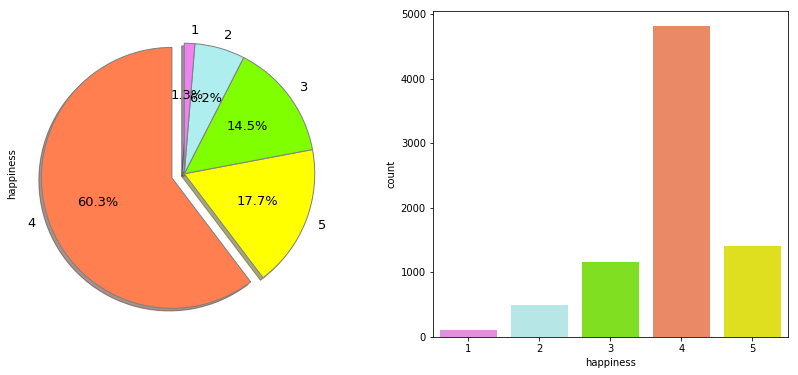

In [27]:
fig, ax = plt.subplots(1, 2, figsize = (14,6))

train['happiness'].value_counts().plot.pie(ax = ax[0],
                                           autopct='%1.1f%%',
                                           explode=[0.1,0,0,0,0],
                                           startangle = 90,
                                           shadow = True,
                                           colors = [ 'coral', 'yellow', 'chartreuse', 'paleturquoise', 'violet'],
                                           wedgeprops = {'linewidth': 1, 'edgecolor': 'gray'},
                                           textprops = {'fontsize': 13, 'color': 'black'})
#plt.title('happiness')
#plt.ylabel('')

color = ['violet', 'paleturquoise','chartreuse' ,'coral','yellow']
sns.countplot('happiness', data = train, ax = ax[1], palette = sns.color_palette(color))


In [29]:
train.groupby(['gender', 'happiness']).size()

gender  happiness
1       1              43
        2             216
        3             588
        4            2306
        5             599
2       1              61
        2             281
        3             571
        4            2512
        5             811
dtype: int64

In [30]:
trans_gender = {1:'male',2:'female'}
train['gender'] = train['gender'].map(trans_gender)

In [31]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,male,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,male,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,female,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,female,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,female,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


trans_gender_op = {'male':1,'female':2}
copy = train['gender'].map(trans_gender_op).copy
train['gender'] = copy

In [32]:
train.shape

(7988, 140)

In [33]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,1,4,1,12,32,59,2015-08-04 14:18:00,male,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50
1,2,4,2,18,52,85,2015-07-21 15:04:00,male,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60
2,3,4,2,29,83,126,2015-07-21 13:24:00,female,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75
3,4,5,2,10,28,51,2015-07-25 17:33:00,female,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80
4,5,4,1,7,18,36,2015-08-10 09:50:00,female,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50


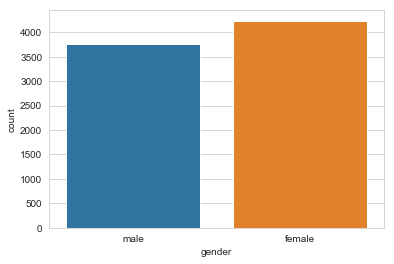

In [34]:
sns.countplot('gender', data=train)

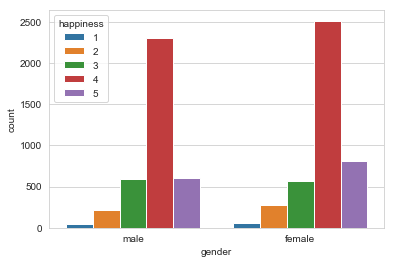

In [35]:
sns.countplot('gender', data = train, hue = 'happiness')

In [36]:
fm = train.groupby(['gender','happiness']).size()

In [37]:
fm.loc['female']

happiness
1      61
2     281
3     571
4    2512
5     811
dtype: int64

Text(0, 0.5, '')

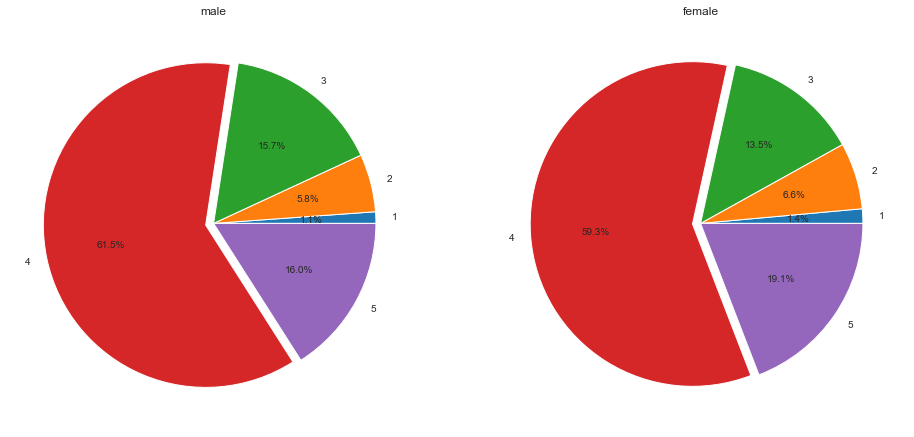

In [38]:
fig, ax = plt.subplots(1,2,figsize = (16,8))
fm.loc['male'].plot.pie(ax = ax[0],autopct='%1.1f%%',explode = [0,0,0,0.05,0])
ax[0].set_title('male')
ax[0].set_ylabel('')
fm.loc['female'].plot.pie(ax = ax[1], autopct = '%1.1f%%', explode = [0,0,0,0.05,0])
ax[1].set_title('female')
ax[1].set_ylabel('')

**用问卷提交时间减生日计算年龄**

In [40]:
age = train['survey_time'].dt.year - train['birth']

In [41]:
train['age'] = age

In [42]:
train.head()

,id,happiness,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
0,1,4,1,12,32,59,2015-08-04 14:18:00,male,1959,1,1,1,11,NaN,4.0,-2.0,20000,1,NaN,45.0,0,1,0,0,0,0,0,0,0,NaN,176,155,3,2,5,5,2.0,4,2,5,5,4,3,1,4,3,1,2,3,4,1,4,5,4,1,2,4,3,3.0,3.0,2,3,3,3,3,1,1,3.0,30.0,1.0,2.0,1,1,1,2,60000.0,2,2,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,0.0,3,1984.0,1958.0,1984.0,6.0,1.0,5.0,40000.0,5.0,NaN,NaN,-2,4,4,1,-2,4,1,1,3,2,4,3,50000.0,4,2,-8,-8,5,3,2,3,4,3,-8,4,1,4,50,60,50,50,30.0,30,50,50,50,56
1,2,4,2,18,52,85,2015-07-21 15:04:00,male,1992,1,1,1,12,NaN,4.0,2013.0,20000,1,NaN,110.0,0,0,0,0,1,0,0,0,0,NaN,170,110,5,4,3,1,1.0,2,2,1,3,5,1,2,3,4,3,5,4,3,2,3,4,5,1,2,4,3,6.0,2.0,1,3,6,4,8,5,1,3.0,2.0,1.0,3.0,1,1,1,1,40000.0,3,4,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1972,3,1,2,1973,3,1,2,1,1,4,2,50000.0,5,4,4,3,5,3,3,3,2,3,3,3,2,3,90,70,70,80,85.0,70,90,60,60,23
2,3,4,2,29,83,126,2015-07-21 13:24:00,female,1967,1,0,3,4,NaN,4.0,-2.0,2000,1,NaN,120.0,0,1,1,0,0,0,0,0,0,NaN,160,122,4,4,5,1,1.0,2,2,2,5,1,3,1,4,4,3,5,4,4,2,3,5,5,5,3,4,2,2.0,5.0,2,4,5,4,6,3,2,NaN,NaN,NaN,NaN,1,1,2,2,8000.0,3,3,1,2,0,1,0,0,0,0,0,0,0,NaN,0,2,1.0,3,1990.0,1968.0,1990.0,3.0,1.0,1.0,6000.0,3.0,NaN,NaN,-2,1,1,2,-2,1,1,2,2,1,4,2,80000.0,3,3,3,3,4,3,3,3,3,3,-8,3,1,4,90,80,75,79,80.0,90,90,90,75,48
3,4,5,2,10,28,51,2015-07-25 17:33:00,female,1943,1,1,1,3,NaN,4.0,1959.0,6420,1,NaN,78.0,0,0,0,1,0,0,0,0,0,NaN,163,170,4,4,4,1,2.0,2,1,1,5,1,1,1,5,2,4,5,4,5,1,1,5,5,5,2,4,4,1.0,6.0,1,4,5,5,7,2,4,NaN,NaN,NaN,NaN,2,2,2,2,12000.0,3,3,1,1,0,1,0,0,0,0,0,0,0,NaN,1,4,0.0,7,1960.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,14,1,2,-2,1,1,2,2,1,3,2,10000.0,3,3,4,3,5,3,3,5,4,3,3,3,2,3,100,90,70,80,80.0,90,90,80,80,72
4,5,4,1,7,18,36,2015-08-10 09:50:00,female,1994,1,1,1,12,NaN,1.0,2014.0,-1,2,NaN,70.0,0,0,0,0,1,0,0,0,0,NaN,165,110,5,5,3,2,3.0,1,3,4,2,5,5,3,3,3,2,4,4,3,5,2,5,5,1,4,3,4,7.0,5.0,3,2,1,1,1,4,6,NaN,NaN,NaN,NaN,1,2,2,2,-2.0,4,3,1,1,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1970,6,1,10,1972,4,1,15,3,2,3,-8,200000.0,4,3,3,3,5,5,3,4,3,3,3,3,2,2,50,50,50,50,50.0,50,50,50,50,21


In [43]:
train1 = train.drop(['survey_time', 'birth'], axis=1)

In [44]:
train1.shape

(7988, 139)

In [45]:
train['age'].min()

18

In [46]:
train['age'].max()

94

In [47]:
bins = np.arange(16, 101, 16)
bins

array([16, 32, 48, 64, 80, 96])

**年龄分布**

(array([1337., 2177., 2560., 1591.,  323.]),
 array([16, 32, 48, 64, 80, 96]),
 <a list of 5 Patch objects>)

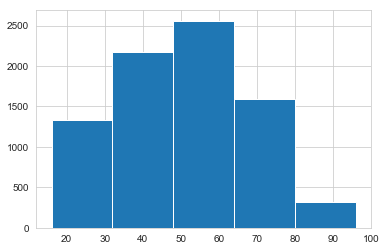

In [48]:
fig = plt.figure()
plt.hist(train['age'], bins = bins)

**年龄区间**

In [49]:
cats = pd.cut(train['age'], bins, labels= ['Q1', 'Q2', 'Q3', 'Q4','Q5'])

In [50]:
train.groupby(cats).size()

age
Q1    1423
Q2    2265
Q3    2523
Q4    1511
Q5     266
dtype: int64

In [51]:
c_g = train.groupby([cats, 'happiness']).size()

In [52]:
c_g

age  happiness
Q1   1              14
     2              53
     3             201
     4             880
     5             275
Q2   1              30
     2             154
     3             352
     4            1386
     5             343
Q3   1              41
     2             182
     3             390
     4            1519
     5             391
Q4   1              18
     2              94
     3             178
     4             897
     5             324
Q5   1               1
     2              14
     3              38
     4             136
     5              77
dtype: int64

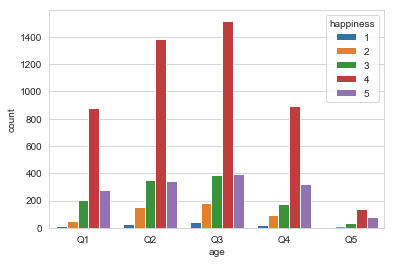

In [53]:
sns.countplot(cats, data = train, hue = 'happiness' )

### 挑选特征变量

In [54]:
features=['happiness','age','inc_ability','gender','status_peer','work_exper','family_status','health','equity','class','health_problem','family_m','house','depression','learn','relax','edu']

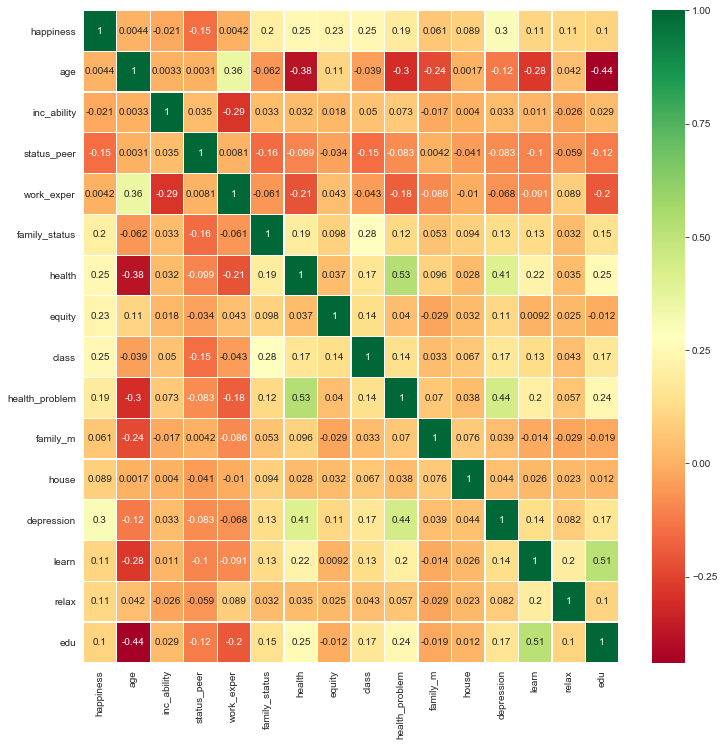

In [55]:
sns.heatmap(train[features].corr(), annot = True, cmap='RdYlGn',linewidths=0.2)
fig = plt.gcf()
fig.set_size_inches(12,12)

In [56]:
train['gender'] = train['gender'].map({'male':1,'female':0})

In [57]:
test['gender'] = test['gender'].map({2:0, 1:1})

In [58]:
test.head()

,id,survey_type,province,city,county,survey_time,gender,birth,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9
0,8001,1,2,2,9,2015-07-24 10:30:00,0,1972,8,0,1,4,NaN,2.0,1989.0,18000,1,NaN,100.0,0,1,1,0,0,0,0,0,0,NaN,155,120,4,4,4,4,1,2,2,1,4,3,2,1,4,2,4,4,3,3,3,3,5,1,3,3,3,2,1.0,3.0,1,2,5,5,5,4,1,5.0,12.0,2.0,3.0,1,1,2,2,-2,5,3,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,1998.0,1972.0,1998.0,4.0,1.0,1.0,18000.0,1.0,5.0,2.0,1935,3,1,13,1936,3,1,13,3,1,4,2,30000.0,4,4,4,4,4,4,3,4,3,3,-8,3,2,4,80,80.0,60,80,80,80,80,80,80
1,8002,1,22,66,106,2015-07-12 15:38:00,0,1938,1,1,1,4,NaN,4.0,-2.0,20000,1,NaN,50.0,0,1,0,1,0,0,0,0,0,NaN,150,75,1,1,2,5,1,1,1,3,5,1,1,1,5,5,5,5,2,1,4,5,5,5,5,5,4,1,1.0,1.0,1,3,3,5,-8,4,5,NaN,NaN,NaN,NaN,1,1,2,2,20000,1,1,2,2,0,1,0,0,0,0,0,0,0,NaN,3,0,0.0,7,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,-2,1,1,2,3,3,4,2,50000.0,3,3,3,3,4,2,2,4,4,4,4,4,4,5,90,80.0,80,80,80,80,70,80,80
2,8003,2,9,22,44,2015-07-05 09:36:00,0,1935,1,1,1,1,NaN,NaN,NaN,500,1,NaN,60.0,0,0,0,1,0,0,0,0,0,NaN,155,85,4,2,2,1,1,1,1,1,1,1,1,5,5,4,5,5,4,5,5,5,5,5,5,2,3,1,2.0,6.0,1,4,1,1,1,2,4,NaN,NaN,NaN,NaN,1,1,2,2,-2,1,2,1,2,0,1,0,0,0,0,0,0,0,NaN,2,3,0.0,7,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,1914,1,1,2,3,1,3,4,2000.0,5,5,4,4,4,3,3,3,4,4,4,2,2,5,95,95.0,80,90,80,95,95,80,90
3,8004,2,18,52,86,2015-07-19 10:10:00,0,1992,1,1,1,4,NaN,2.0,-1.0,50000,1,NaN,220.0,0,0,1,0,0,0,0,0,0,NaN,160,126,5,5,5,1,1,2,2,1,5,4,1,1,5,4,4,5,3,4,4,3,3,3,3,2,2,2,1.0,1.0,1,4,5,4,6,5,5,NaN,NaN,NaN,NaN,2,2,2,2,100000,2,4,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,2014.0,1991.0,2014.0,4.0,1.0,1.0,50000.0,1.0,3.0,1.0,1967,4,1,2,1966,1,1,2,2,1,3,2,80000.0,4,4,3,3,4,3,3,3,3,3,3,3,3,4,80,80.0,70,90,80,80,70,60,50
4,8005,2,24,70,110,2015-08-03 11:41:00,1,1990,1,1,2,1,NaN,NaN,NaN,0,1,NaN,200.0,1,0,0,0,0,0,0,0,0,NaN,173,130,4,5,3,4,1,1,1,1,4,4,1,2,3,4,4,5,4,2,5,3,5,5,1,4,4,2,1.0,4.0,6,2,2,4,6,1,2,NaN,NaN,NaN,NaN,1,1,2,2,30000,3,2,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,3,1,2,-2,-8,-8,-8,2,2,5,2,-2.0,4,3,4,4,5,4,3,-8,4,3,4,5,1,-8,60,50.0,0,30,40,50,60,-2,60


In [59]:
age = test['survey_time'].dt.year - test['birth']
test['age'] = age
test = test.drop(['survey_time','birth'], axis = 1)
test.shape

(2968, 138)

In [62]:
features2 = ['age','inc_ability','gender','status_peer','work_exper','family_status','health','equity','class','health_problem','family_m','house','depression','learn','relax','edu']

In [64]:
x_test = test[features2].values

In [65]:
test.head()

,id,survey_type,province,city,county,gender,nationality,religion,religion_freq,edu,edu_other,edu_status,edu_yr,income,political,join_party,floor_area,property_0,property_1,property_2,property_3,property_4,property_5,property_6,property_7,property_8,property_other,height_cm,weight_jin,health,health_problem,depression,hukou,hukou_loc,media_1,media_2,media_3,media_4,media_5,media_6,leisure_1,leisure_2,leisure_3,leisure_4,leisure_5,leisure_6,leisure_7,leisure_8,leisure_9,leisure_10,leisure_11,leisure_12,socialize,relax,learn,social_neighbor,social_friend,socia_outing,equity,class,class_10_before,class_10_after,class_14,work_exper,work_status,work_yr,work_type,work_manage,insur_1,insur_2,insur_3,insur_4,family_income,family_m,family_status,house,car,invest_0,invest_1,invest_2,invest_3,invest_4,invest_5,invest_6,invest_7,invest_8,invest_other,son,daughter,minor_child,marital,marital_1st,s_birth,marital_now,s_edu,s_political,s_hukou,s_income,s_work_exper,s_work_status,s_work_type,f_birth,f_edu,f_political,f_work_14,m_birth,m_edu,m_political,m_work_14,status_peer,status_3_before,view,inc_ability,inc_exp,trust_1,trust_2,trust_3,trust_4,trust_5,trust_6,trust_7,trust_8,trust_9,trust_10,trust_11,trust_12,trust_13,neighbor_familiarity,public_service_1,public_service_2,public_service_3,public_service_4,public_service_5,public_service_6,public_service_7,public_service_8,public_service_9,age
0,8001,1,2,2,9,0,8,0,1,4,NaN,2.0,1989.0,18000,1,NaN,100.0,0,1,1,0,0,0,0,0,0,NaN,155,120,4,4,4,4,1,2,2,1,4,3,2,1,4,2,4,4,3,3,3,3,5,1,3,3,3,2,1.0,3.0,1,2,5,5,5,4,1,5.0,12.0,2.0,3.0,1,1,2,2,-2,5,3,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,1998.0,1972.0,1998.0,4.0,1.0,1.0,18000.0,1.0,5.0,2.0,1935,3,1,13,1936,3,1,13,3,1,4,2,30000.0,4,4,4,4,4,4,3,4,3,3,-8,3,2,4,80,80.0,60,80,80,80,80,80,80,43
1,8002,1,22,66,106,0,1,1,1,4,NaN,4.0,-2.0,20000,1,NaN,50.0,0,1,0,1,0,0,0,0,0,NaN,150,75,1,1,2,5,1,1,1,3,5,1,1,1,5,5,5,5,2,1,4,5,5,5,5,5,4,1,1.0,1.0,1,3,3,5,-8,4,5,NaN,NaN,NaN,NaN,1,1,2,2,20000,1,1,2,2,0,1,0,0,0,0,0,0,0,NaN,3,0,0.0,7,1959.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,-2,1,1,2,3,3,4,2,50000.0,3,3,3,3,4,2,2,4,4,4,4,4,4,5,90,80.0,80,80,80,80,70,80,80,77
2,8003,2,9,22,44,0,1,1,1,1,NaN,NaN,NaN,500,1,NaN,60.0,0,0,0,1,0,0,0,0,0,NaN,155,85,4,2,2,1,1,1,1,1,1,1,1,5,5,4,5,5,4,5,5,5,5,5,5,2,3,1,2.0,6.0,1,4,1,1,1,2,4,NaN,NaN,NaN,NaN,1,1,2,2,-2,1,2,1,2,0,1,0,0,0,0,0,0,0,NaN,2,3,0.0,7,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2,1,1,2,1914,1,1,2,3,1,3,4,2000.0,5,5,4,4,4,3,3,3,4,4,4,2,2,5,95,95.0,80,90,80,95,95,80,90,80
3,8004,2,18,52,86,0,1,1,1,4,NaN,2.0,-1.0,50000,1,NaN,220.0,0,0,1,0,0,0,0,0,0,NaN,160,126,5,5,5,1,1,2,2,1,5,4,1,1,5,4,4,5,3,4,4,3,3,3,3,2,2,2,1.0,1.0,1,4,5,4,6,5,5,NaN,NaN,NaN,NaN,2,2,2,2,100000,2,4,1,2,0,1,0,0,0,0,0,0,0,NaN,1,0,1.0,3,2014.0,1991.0,2014.0,4.0,1.0,1.0,50000.0,1.0,3.0,1.0,1967,4,1,2,1966,1,1,2,2,1,3,2,80000.0,4,4,3,3,4,3,3,3,3,3,3,3,3,4,80,80.0,70,90,80,80,70,60,50,23
4,8005,2,24,70,110,1,1,1,2,1,NaN,NaN,NaN,0,1,NaN,200.0,1,0,0,0,0,0,0,0,0,NaN,173,130,4,5,3,4,1,1,1,1,4,4,1,2,3,4,4,5,4,2,5,3,5,5,1,4,4,2,1.0,4.0,6,2,2,4,6,1,2,NaN,NaN,NaN,NaN,1,1,2,2,30000,3,2,1,2,0,1,0,0,0,0,0,0,0,NaN,0,0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1964,3,1,2,-2,-8,-8,-8,2,2,5,2,-2.0,4,3,4,4,5,4,3,-8,4,3,4,5,1,-8,60,50.0,0,30,40,50,60,-2,60,25


In [66]:
test[features2].isnull().sum()

age               0
inc_ability       0
gender            0
status_peer       0
work_exper        0
family_status     0
health            0
equity            0
class             0
health_problem    0
family_m          0
house             0
depression        0
learn             0
relax             0
edu               0
dtype: int64

In [67]:
data = train[features2]

In [68]:
data.isnull().sum()

age               0
inc_ability       0
gender            0
status_peer       0
work_exper        0
family_status     0
health            0
equity            0
class             0
health_problem    0
family_m          0
house             0
depression        0
learn             0
relax             0
edu               0
dtype: int64

### 采用 逻辑回归模型进行预测，由于是多元分类且数据量不算小，所以不用默认的liblinear算法，采用newton-cg寻找参数最优解

In [69]:
x_train = train[features2].values
y_train = train['happiness'].values

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV

In [71]:
model = LogisticRegressionCV(random_state = 10, solver = 'newton-cg', multi_class = 'multinomial')

In [72]:
model.fit(x_train, y_train)

D:\ProgramData\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


LogisticRegressionCV(Cs=10, class_weight=None, cv='warn', dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='multinomial', n_jobs=None, penalty='l2',
           random_state=10, refit=True, scoring=None, solver='newton-cg',
           tol=0.0001, verbose=0)

In [73]:
y_esti = model.predict(x_train)
(y_esti == y_train).mean()

0.6059088632949424

### 评测指标
用训练数据打分<br>
分数计算公式：$$score = \frac{1}{n}\sum_1^n(y_i-y^*)^2$$

In [74]:
((y_esti-y_train)**2).mean()

0.6357035553329995

### 预测测试数据集

In [80]:
y_predict = model.predict(x_test)

In [76]:
test['happiness'] = y_predict
submit = test[['id', 'happiness']]

### 将此结果提交

In [77]:
submit.to_excel('d:/python/exercise/samples/happiness/submit_02.xlsx')

In [78]:
model.score(x_train, y_train)

0.6059088632949424

### 比赛排名如下：得分0.681

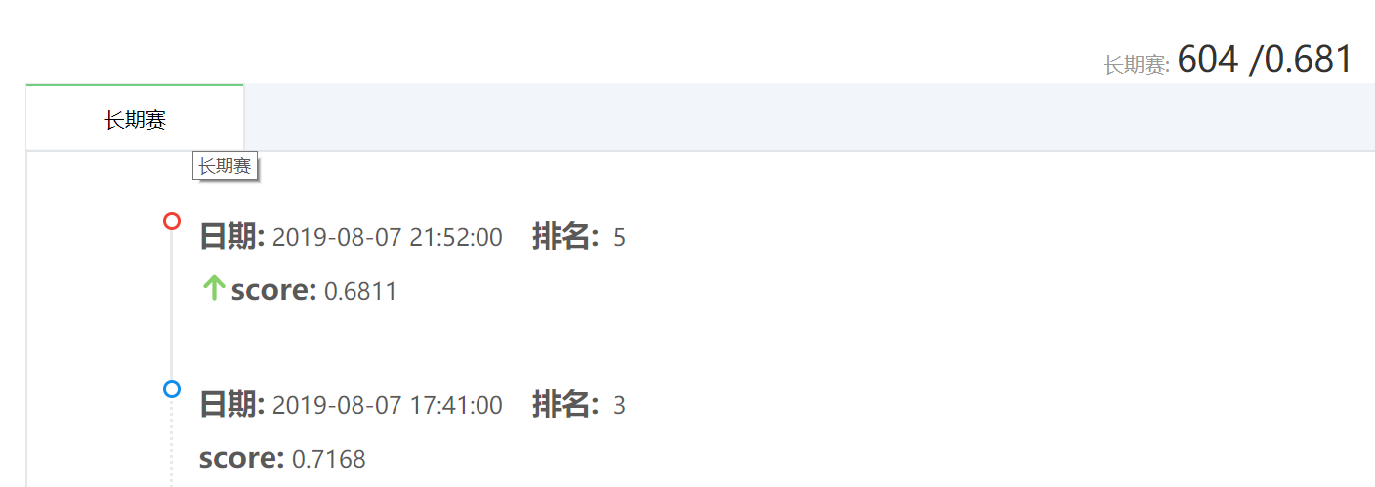

In [79]:
from IPython.display import Image
Image(filename = 'C:/Users/24866/happy_score.png')